<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Collab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.



In [1]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


#Digits dataset


The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

Note: if we were working from image files (e.g., ‘png’ files), we would load them using matplotlib.pyplot.imread.



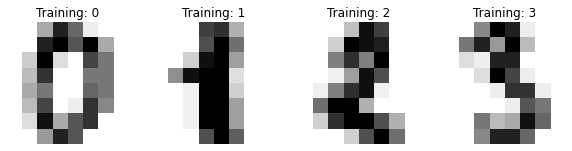

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

#Classification

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.


We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted digit value in the title.



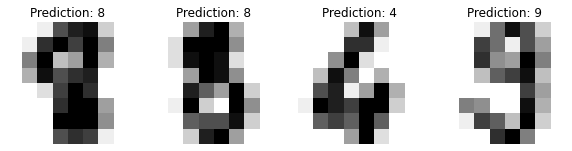

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

classification_report builds a text report showing the main classification metrics.



In [5]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

We can also plot a confusion matrix of the true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


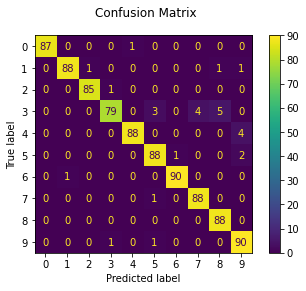

In [6]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Total running time of the script: ( 0 minutes 0.925 seconds)

#Capture Camera, xử lý ảnh và in kết quả

In [17]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
#Capture camera
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

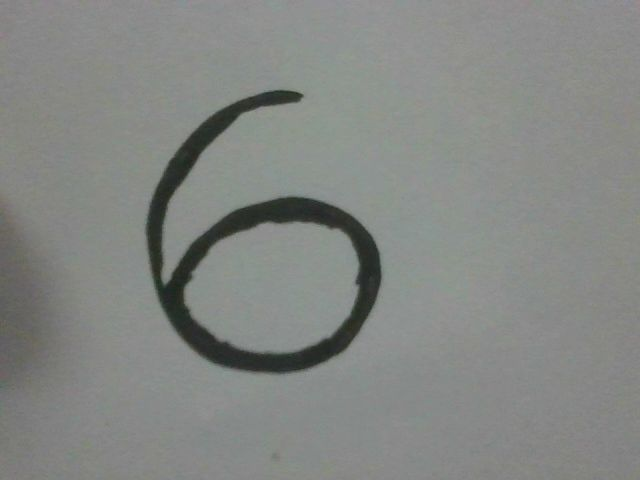

Picture 1 , Result predict: [4]


<IPython.core.display.Javascript object>

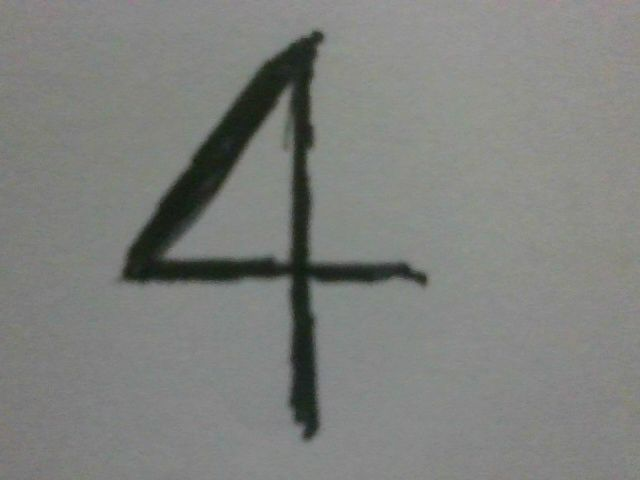

Picture 2 , Result predict: [4]


<IPython.core.display.Javascript object>

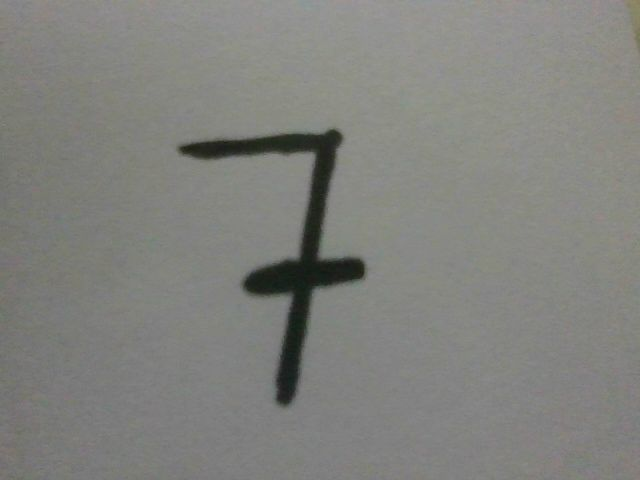

Picture 3 , Result predict: [8]


<IPython.core.display.Javascript object>

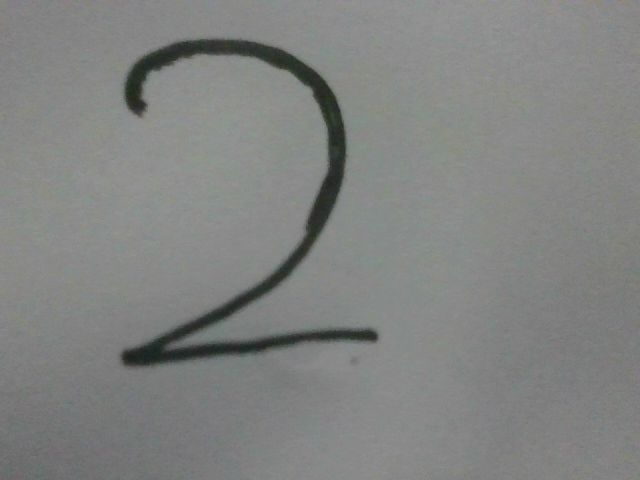

Picture 4 , Result predict: [8]


<IPython.core.display.Javascript object>

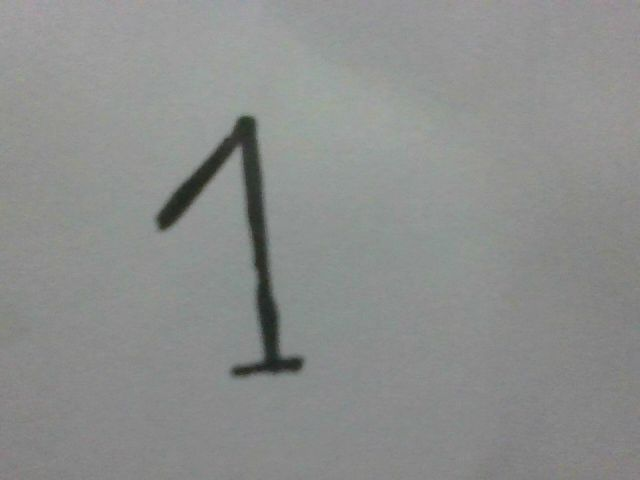

Picture 5 , Result predict: [1]


<IPython.core.display.Javascript object>

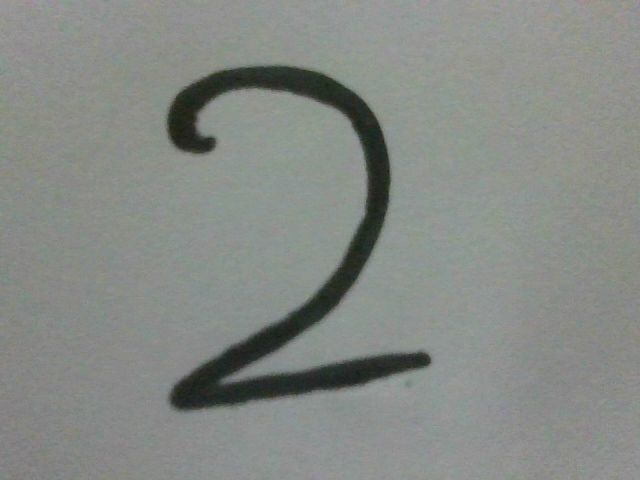

Picture 6 , Result predict: [2]


<IPython.core.display.Javascript object>

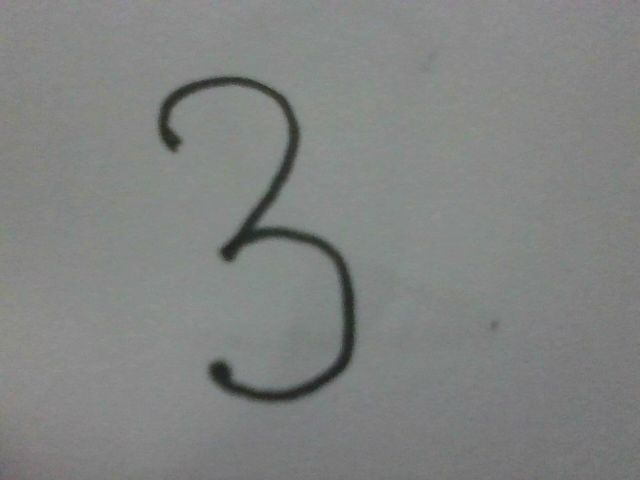

Picture 7 , Result predict: [5]


<IPython.core.display.Javascript object>

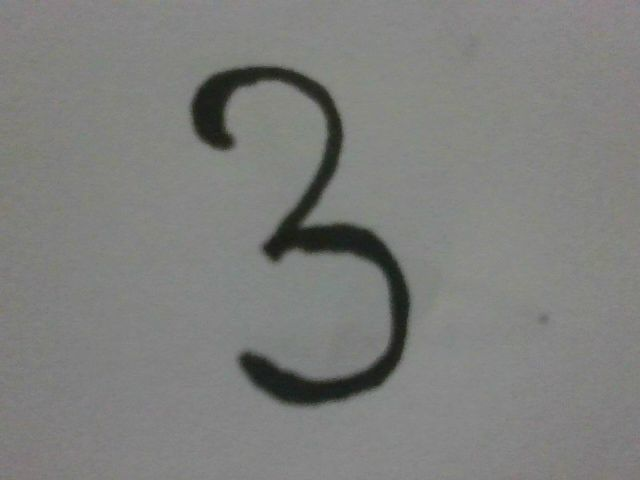

Picture 8 , Result predict: [5]


<IPython.core.display.Javascript object>

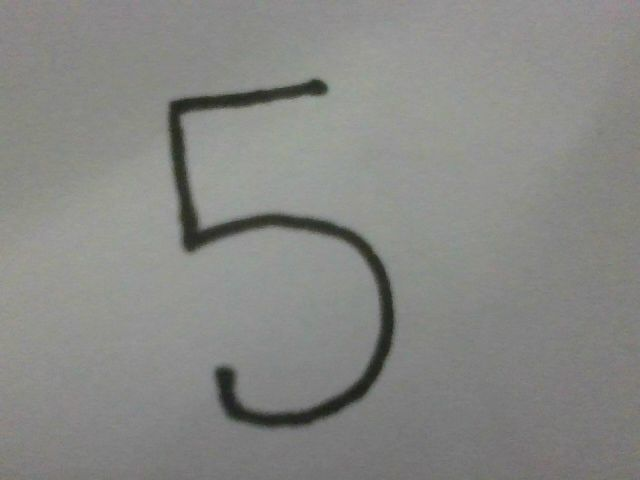

Picture 9 , Result predict: [5]


<IPython.core.display.Javascript object>

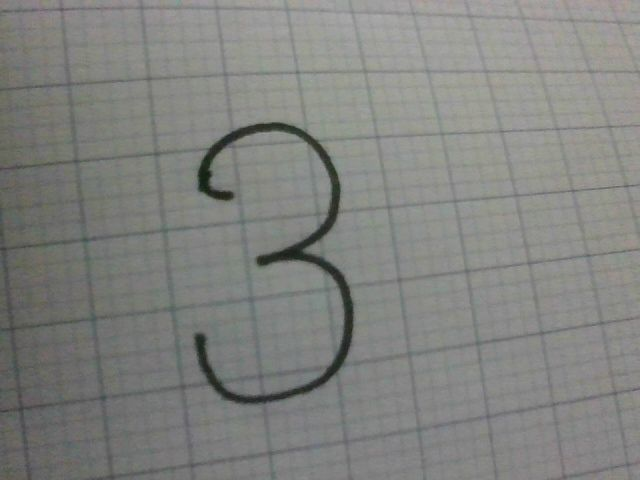

Picture 10 , Result predict: [1]


<IPython.core.display.Javascript object>

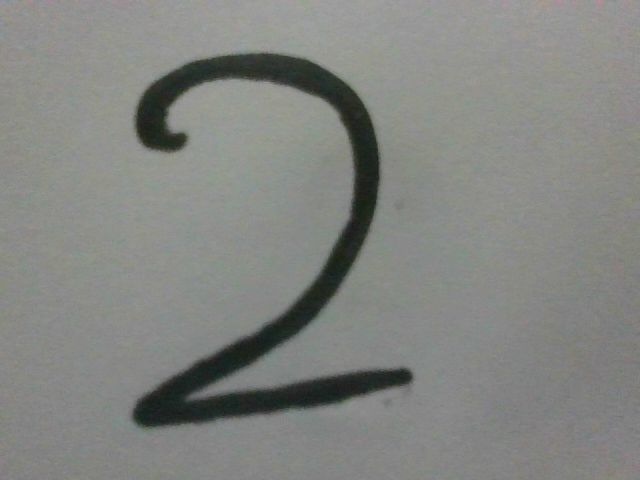

Picture 11 , Result predict: [2]


<IPython.core.display.Javascript object>

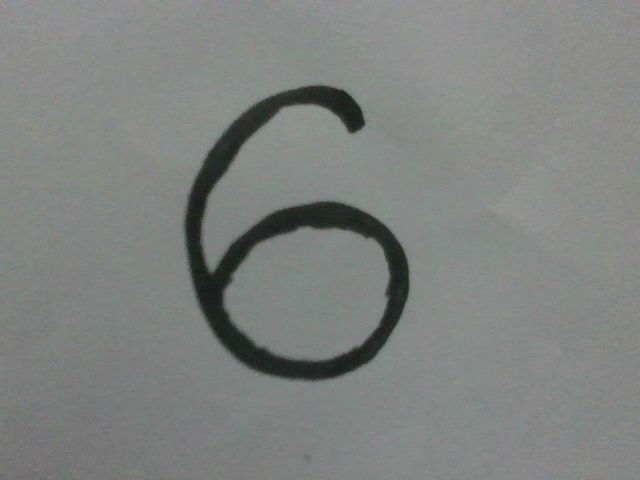

Picture 12 , Result predict: [4]


<IPython.core.display.Javascript object>

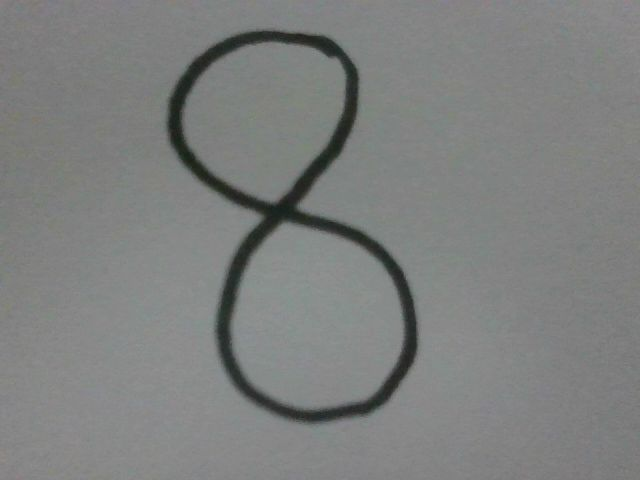

Picture 13 , Result predict: [5]


<IPython.core.display.Javascript object>

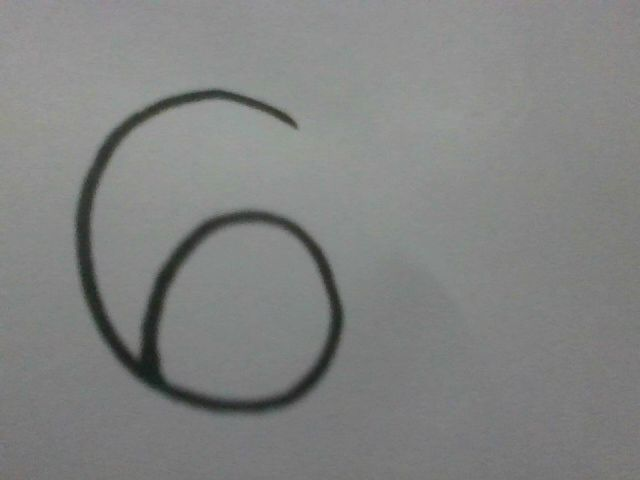

Picture 14 , Result predict: [4]


<IPython.core.display.Javascript object>

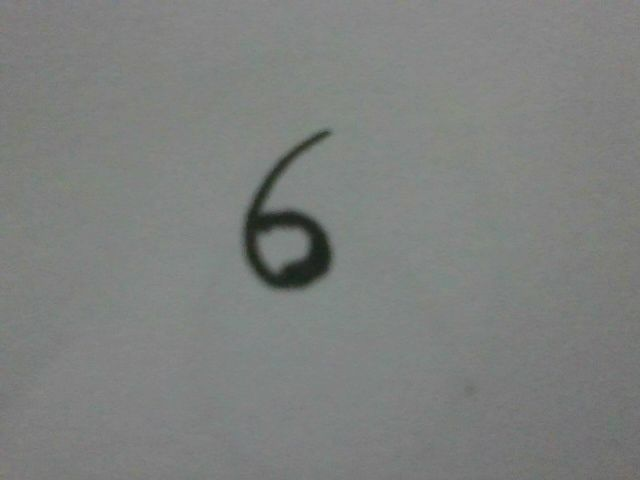

Picture 15 , Result predict: [9]


<IPython.core.display.Javascript object>

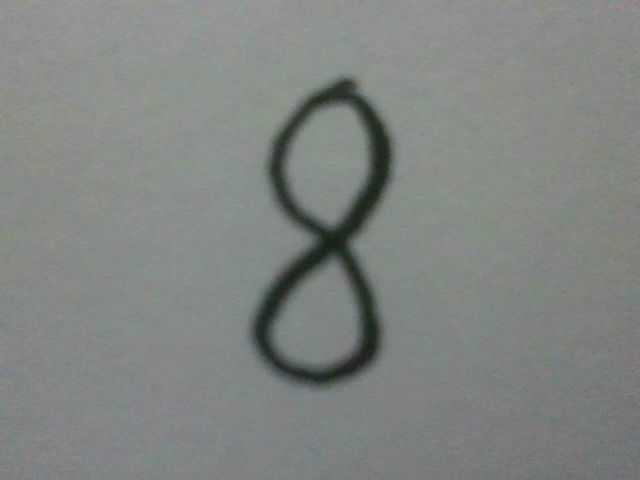

Picture 16 , Result predict: [1]


<IPython.core.display.Javascript object>

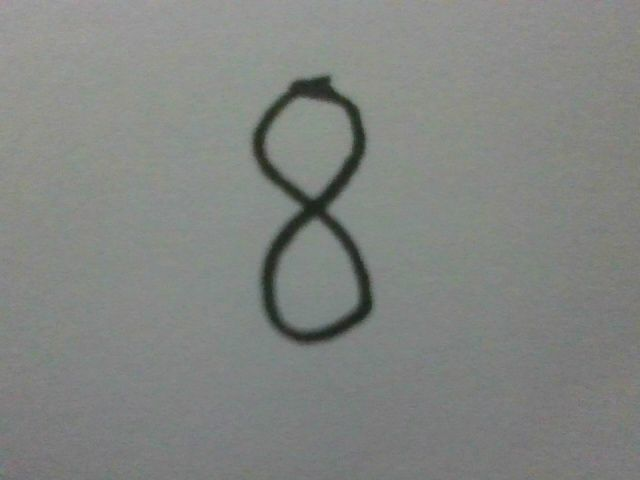

Picture 17 , Result predict: [1]


<IPython.core.display.Javascript object>

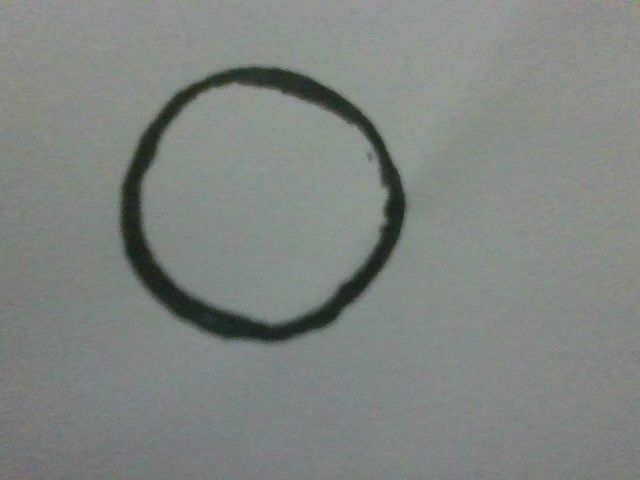

Picture 18 , Result predict: [4]


<IPython.core.display.Javascript object>

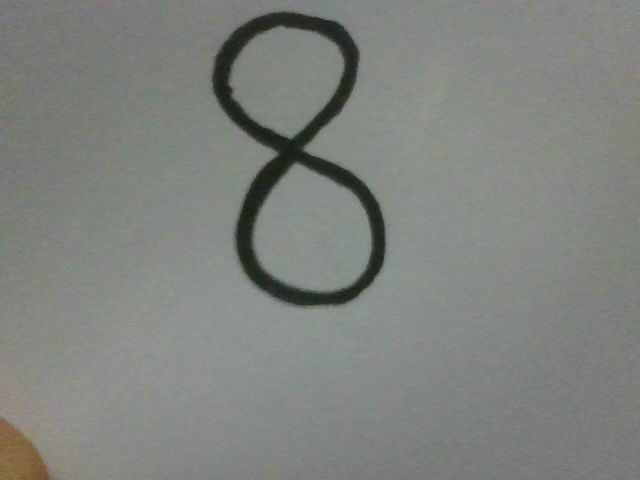

Picture 19 , Result predict: [7]


<IPython.core.display.Javascript object>

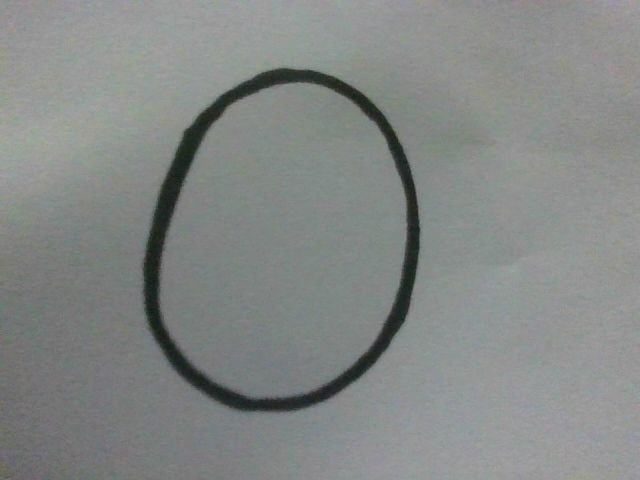

Picture 20 , Result predict: [4]


In [41]:
from IPython.display import Image
import cv2
for i in range(20):
  try:
    filename = take_photo()
  
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
    #Nguồn: https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab
  
  
#Xử lý ảnh và dự đoán kết quả 
  image = cv2.imread('photo.jpg')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret, thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
  ret, thresh_binary = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
  resize1 = cv2.resize(thresh_binary, (8, 8), interpolation = cv2.INTER_AREA)
  norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  reshape = norm_image.reshape(-1, 64)

  reshape.shape

  #print(reshape)

  predict = clf.predict(reshape)
  print("Picture",i+1,",", end = " ")
  print("Result predict:",predict)

#Trả lời các câu hỏi yêu cầu:


- Số trường hợp đúng: 5/20

1. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
- Kết quả chạy thực tế với webcam của laptop và giấy viết tay cho ra kết quả **Không tốt**
2. Ủa mà nhìn vào đâu để kết luận là tốt hay không?
- Kết quả chạy thực tế không tốt vì số trường hợp dự đoán đúng quá thấp.
3. Nếu không tốt thì lý do tại sao?
- Nét chữ không được đậm. Có vài trường hợp lúc đầu dự đoán không chính xác nhưng khi làm đậm thì lại cho kết quả chính xác.
- Độ phân giải camera không được cao nên ảnh không được nét.
- Độ sáng khi chụp không đủ.
4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
- Không thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà.
- Nếu muốn sử dụng nó thì buộc lòng phải có bộ test và môi trường tốt hơn, bài toán nhận dạng biển số nhà mang nặng tính thực tế nên nếu áp dụng thì kết quả sẽ không được tốt